In [8]:
# ===============================
# |     Data Cleaning Step      |
# ===============================


# ===============================
# 1. Import required libraries
# ===============================
import pandas as pd
import numpy as np

# ===============================
# 2. Load the dataset
# ===============================
df = pd.read_csv("Walmart_sales.csv")

# Preview the first rows
df.head()


# ===============================
# 3. Inspect dataset structure
# ===============================
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nNumber of duplicated rows:", df.duplicated().sum())


# ===============================
# 4. Convert 'Date' column to datetime
# ===============================
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# Extract useful time features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)  # Convert to int


# ===============================
# 5. Statistical summary (to detect anomalies)
# ===============================
print("\nDescriptive Statistics:")
df.describe()


# ===============================
# 6. Remove impossible or abnormal values
# ===============================

# 6.1 Remove negative weekly sales (if any)
df = df[df["Weekly_Sales"] >= 0]

# 6.2 Remove impossible temperature values
# Assumption: valid temperature range is between -30°C and 60°C
df = df[(df["Temperature"] >= -30) & (df["Temperature"] <= 60)]

# 6.3 Remove abnormal fuel price values
# Assumption: fuel price should be between 1 and 10 USD
df = df[(df["Fuel_Price"] >= 1) & (df["Fuel_Price"] <= 10)]


# ===============================
# 7. Handle missing values
# ===============================

# Because this dataset usually has no missing values,
# we still apply safe cleaning techniques:

# Option: fill missing CPI and Unemployment with median values
df["CPI"] = df["CPI"].fillna(df["CPI"].median())
df["Unemployment"] = df["Unemployment"].fillna(df["Unemployment"].median())

# Option: fill any remaining missing numeric values
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# ===============================
# 8. Reset index after cleaning
# ===============================
df = df.reset_index(drop=True)

# ===============================
# ✅ 9. Final verification
# ===============================
print("\nFinal Dataset Shape:", df.shape)
print("\nRemaining Missing Values:")
print(df.isnull().sum())

df.head()

# ===============================
# ✅ 10. Save Cleaned Dataset
# ===============================
df.to_csv("Walmart_sales_clean.csv", index=False)
print("\n💾 Clean dataset saved as Walmart_sales_clean.csv")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB

Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Number of duplicated rows: 0

Descriptive Statistics:

Final Dataset Shape: (2937, 11)

Remaining Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Pr

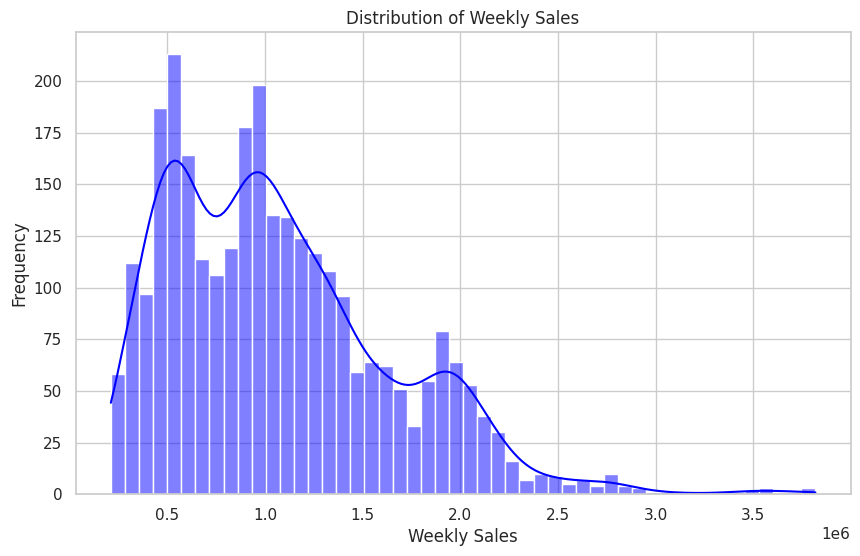

/tmp/ipython-input-1188751258.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis")


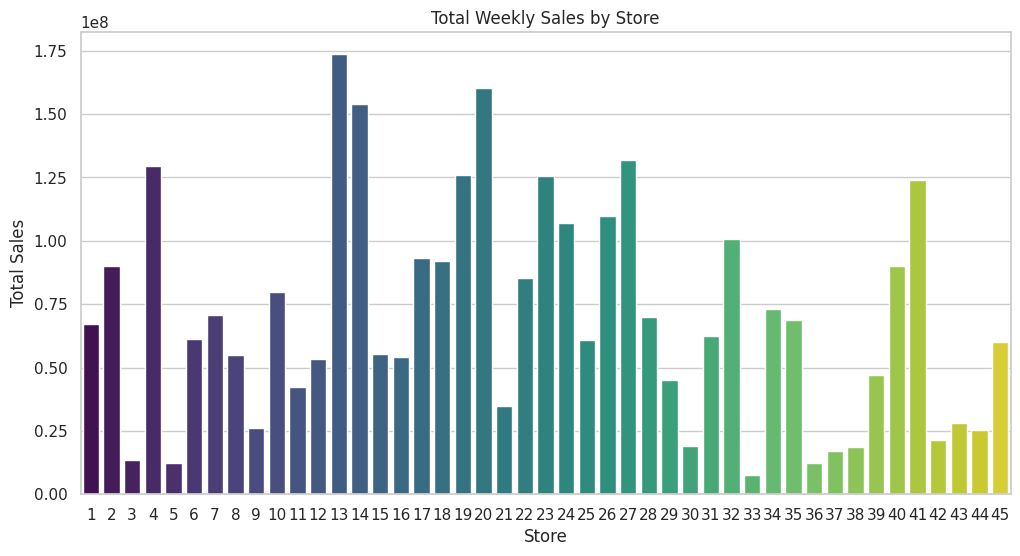

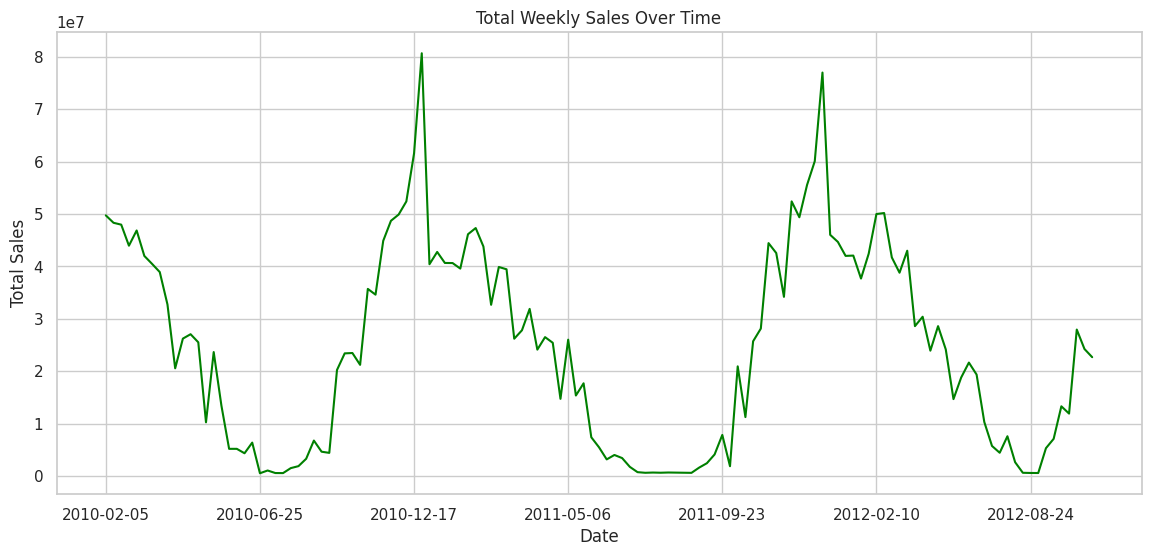

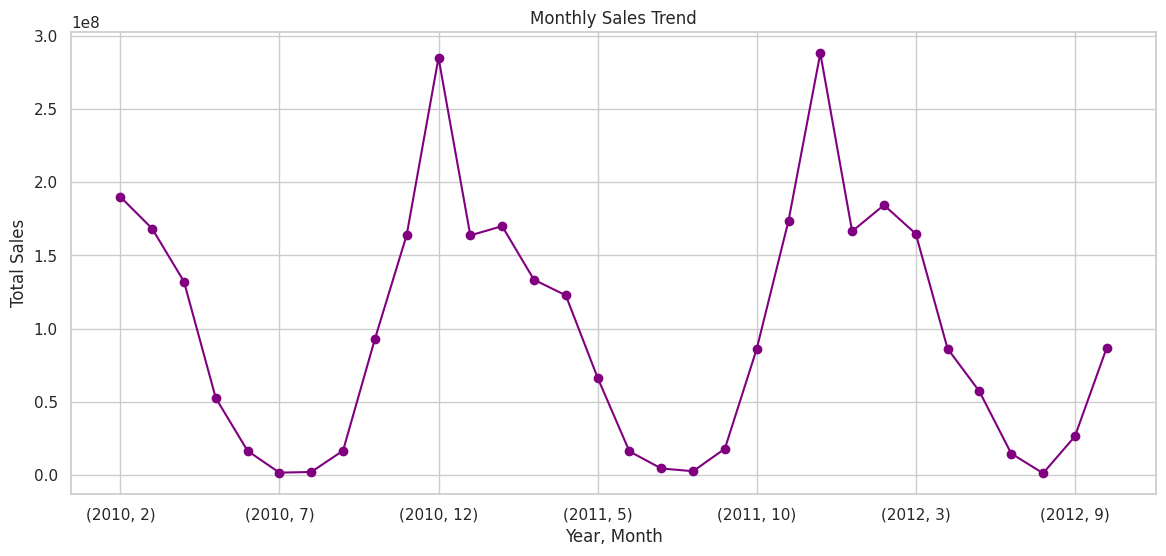

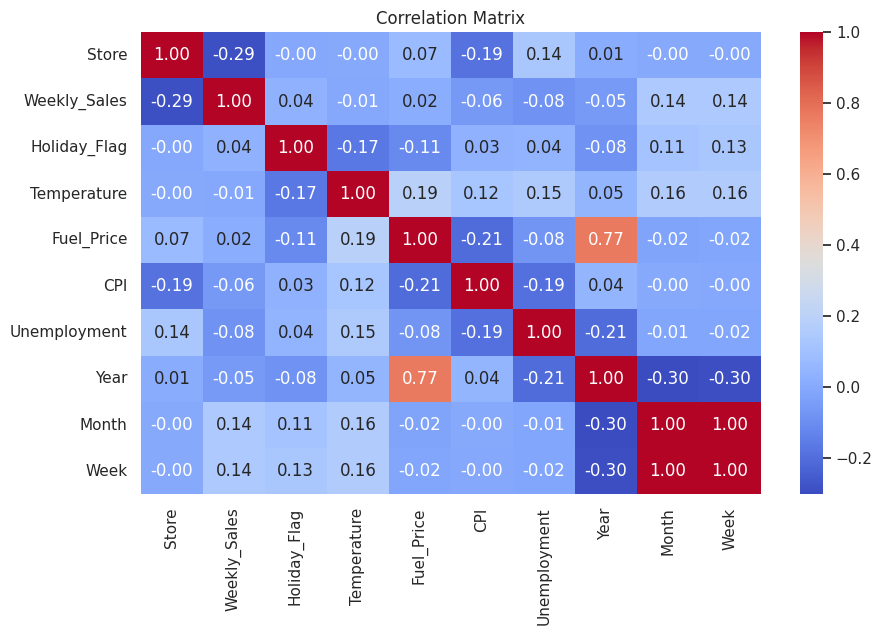

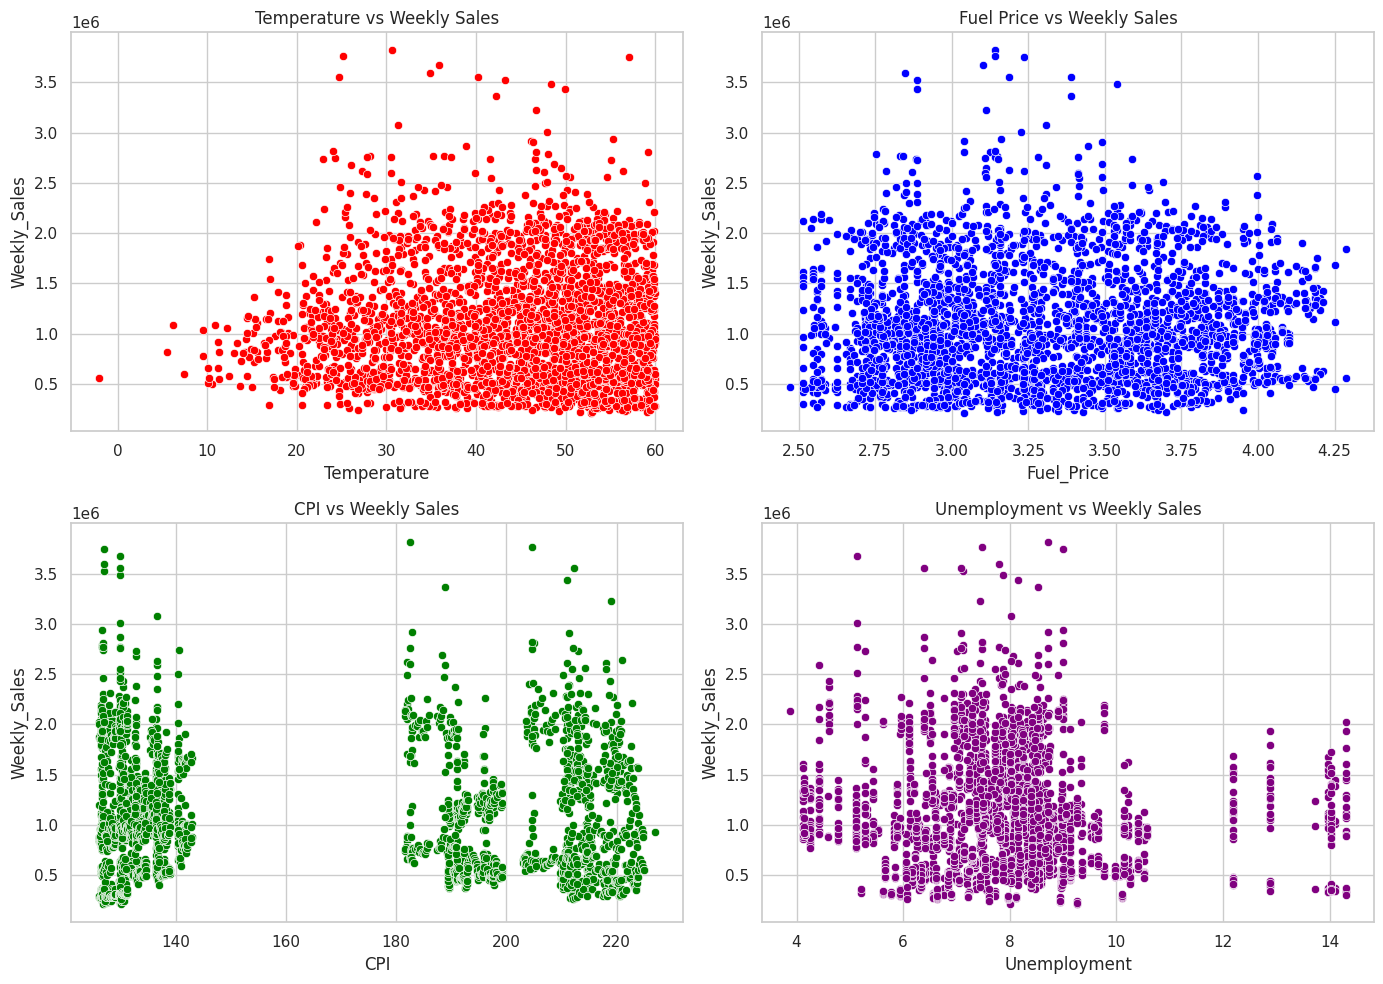

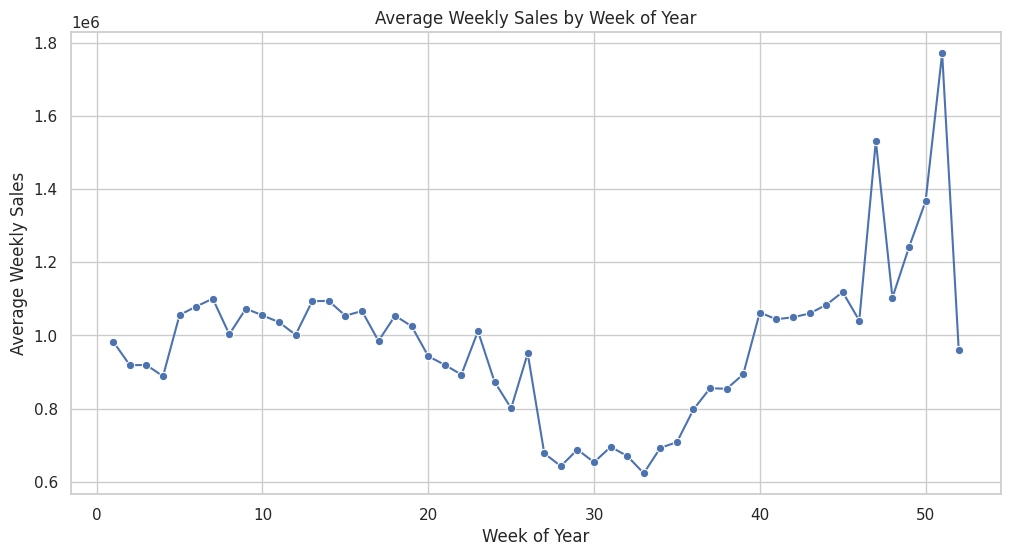

In [10]:
# ==================================
# |Sales Visualization and Insights|
# ==================================


# ===============================
# 1. Import required libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ===============================
# 2. Load and preview the dataset
# ===============================
df = pd.read_csv("Walmart_sales_clean.csv")

# ===============================
# 3. Distribution of Weekly Sales
# ===============================
plt.figure(figsize=(10,6))
sns.histplot(df["Weekly_Sales"], bins=50, kde=True, color='blue')
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

# ===============================
# 4. Total sales by Store
# ===============================
plt.figure(figsize=(12,6))
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis")
plt.title("Total Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

# ===============================
# 5. Sales over time
# ===============================
plt.figure(figsize=(14,6))
df.groupby("Date")["Weekly_Sales"].sum().plot(color='green')
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Monthly trend
plt.figure(figsize=(14,6))
monthly_sales = df.groupby(["Year","Month"])["Weekly_Sales"].sum()
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Year, Month")
plt.ylabel("Total Sales")
plt.show()

# ===============================
# 6. Correlation analysis
# ===============================
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ===============================
# 7. Effect of external factors
# ===============================
fig, axs = plt.subplots(2, 2, figsize=(14,10))
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=df, ax=axs[0,0], color='red')
axs[0,0].set_title("Temperature vs Weekly Sales")

sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=df, ax=axs[0,1], color='blue')
axs[0,1].set_title("Fuel Price vs Weekly Sales")

sns.scatterplot(x="CPI", y="Weekly_Sales", data=df, ax=axs[1,0], color='green')
axs[1,0].set_title("CPI vs Weekly Sales")

sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=df, ax=axs[1,1], color='purple')
axs[1,1].set_title("Unemployment vs Weekly Sales")

plt.tight_layout()
plt.show()

# ===============================
# 8. Weekly seasonality
# ===============================
plt.figure(figsize=(12,6))
weekly_sales = df.groupby("Week")["Weekly_Sales"].mean()
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o')
plt.title("Average Weekly Sales by Week of Year")
plt.xlabel("Week of Year")
plt.ylabel("Average Weekly Sales")
plt.show()

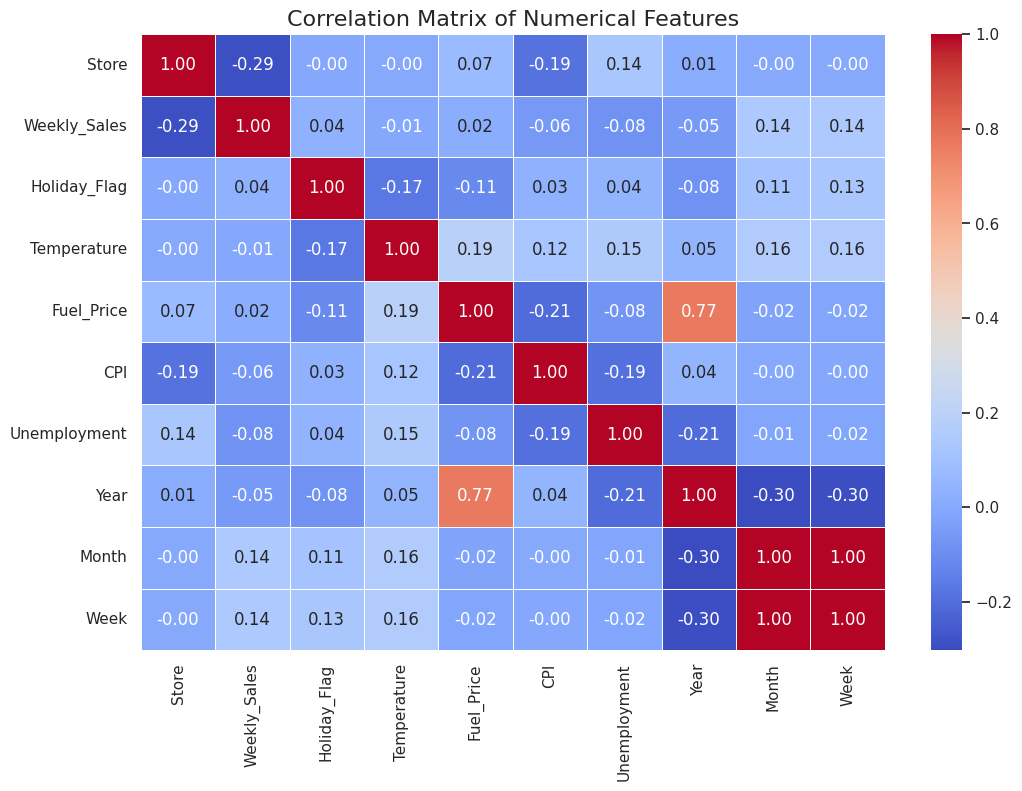

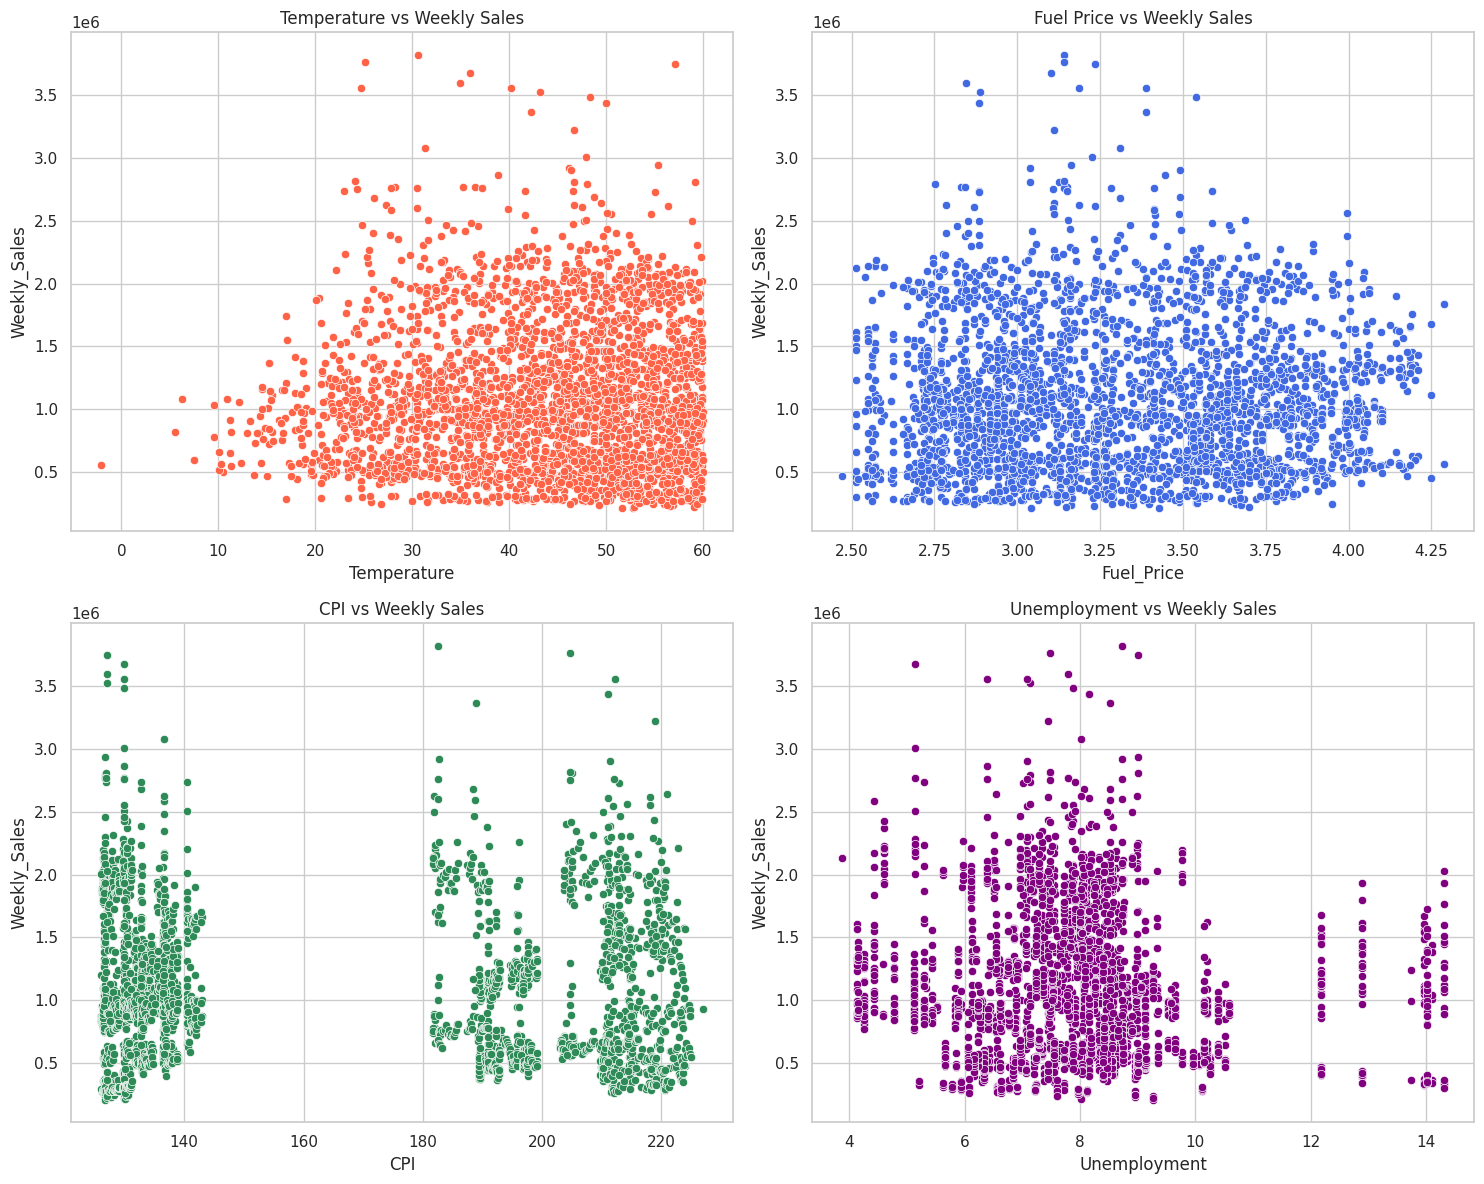

In [11]:
# ===============================
# |    Correlation Analysis     |
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("Walmart_sales_clean.csv")

# ===============================
# 1. Compute correlation matrix
# ===============================
numeric_cols = df.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_cols.corr()

# ===============================
# 2. Correlation Heatmap
# ===============================
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=.5
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

# ===============================
# 3. Scatterplots: External Factors vs Weekly Sales
# ===============================

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Temperature
sns.scatterplot(
    x="Temperature",
    y="Weekly_Sales",
    data=df,
    ax=axs[0, 0],
    color='tomato'
)
axs[0, 0].set_title("Temperature vs Weekly Sales")

# Fuel Price
sns.scatterplot(
    x="Fuel_Price",
    y="Weekly_Sales",
    data=df,
    ax=axs[0, 1],
    color='royalblue'
)
axs[0, 1].set_title("Fuel Price vs Weekly Sales")

# CPI
sns.scatterplot(
    x="CPI",
    y="Weekly_Sales",
    data=df,
    ax=axs[1, 0],
    color='seagreen'
)
axs[1, 0].set_title("CPI vs Weekly Sales")

# Unemployment
sns.scatterplot(
    x="Unemployment",
    y="Weekly_Sales",
    data=df,
    ax=axs[1, 1],
    color='purple'
)
axs[1, 1].set_title("Unemployment vs Weekly Sales")

plt.tight_layout()
plt.show()

===== Linear Regression Results =====
MAE: 437472.92662849446
RMSE: 545517.2829201487

===== Random Forest Results =====
MAE: 76464.69558858719
RMSE: 134396.95255415668


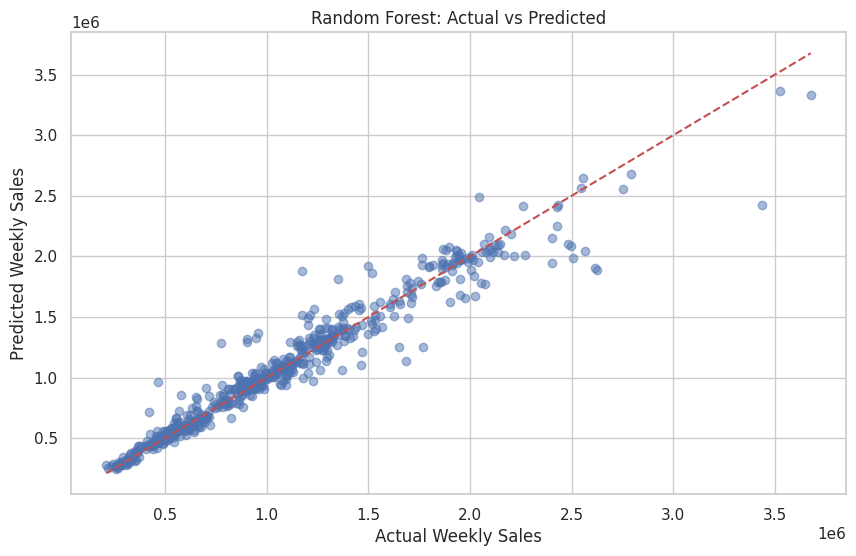

/tmp/ipython-input-974300724.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")


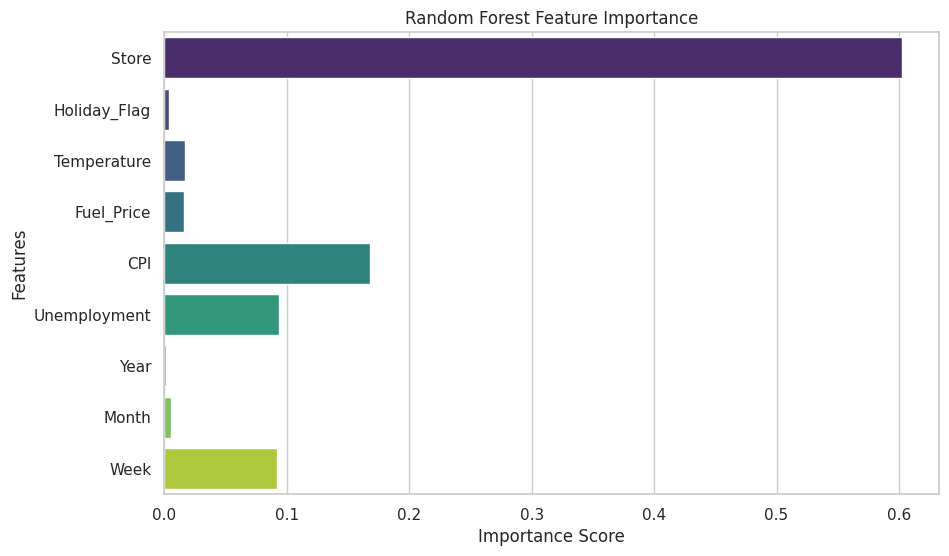

In [12]:
# ================================
# |    Machine Learning Model    |
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set(style="whitegrid")

# ===============================
# 1. Load Clean Dataset
# ===============================
df = pd.read_csv("Walmart_sales_clean.csv")

# ===============================
# 2. Select Features and Target
# ===============================
features = [
    "Store",
    "Holiday_Flag",
    "Temperature",
    "Fuel_Price",
    "CPI",
    "Unemployment",
    "Year",
    "Month",
    "Week"
]

X = df[features]
y = df["Weekly_Sales"]

# ===============================
# 3. Train/Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 4. Linear Regression Model
# ===============================
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)

# Evaluation
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("===== Linear Regression Results =====")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)

# ===============================
# 5. Random Forest Model
# ===============================
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=12
)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("\n===== Random Forest Results =====")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)

# ===============================
# 6. Compare Actual vs Predicted (Best Model)
# ===============================
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# ===============================
# 7. Feature Importance
# ===============================
importance = rf_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()